# PSD (Power Spectral Density) measurement
This will compuete PSD for continuous seismic waveforms and requires ObsPy and Matplotlib

## Import ObsPy module

In [1]:
from obspy import read, read_inventory
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.signal import PPSD
from obspy.imaging.cm import pqlx

import obspy as ob
print("# obspy version = ",ob.__version__)

# obspy version =  1.2.2


## Set size of figure

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8

## Set size of figure

In [3]:
# font size
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Set client (Data Center)
This example uses NCEDC. We can use other dataceneter (e.g., SCEDC, IRIS, GEOFON...)

In [4]:
#client = Client("NCEDC") # data from NCEDC
#client = Client("SCEDC") # data from SCEDC
client = Client("IRIS") # data from IRIS for Cascadia SA-ULN

## Set SNCL
Which SNCL (Station, Network, Component, Location)? This example uses NSMTC.NV.CNZ.B2 data

In [5]:
#http://ds.iris.edu/mda/NV/NSMTC/
sta = "NSMTC" # station
net = "NV" # network
com = "CNZ" # component
loc = "B2" # location

## Set time window
This example uses data collected between 2018/08/15/-2018/08/16

In [6]:
start_day = "2018-08-15:00:00:00"
end_day = "2018-08-16:00:00:00"
starttime = UTCDateTime(start_day)
endtime = UTCDateTime(end_day)

## PSD time window
This example uses 3600-sec-long (1hour) data

In [7]:
#ppsd_length = 7200 #  2h
ppsd_length = 3600 #  1h

## Get instrument reponse
use get_stations with level = "response"

In [8]:
inv = client.get_stations(network=net, station=sta, location=loc, channel=com,
                                starttime=starttime, endtime=endtime, level="response")
print(inv)

Inventory created at 2020-08-20T22:47:10.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.45
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2018-08-15...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			NV
		Stations (1):
			NV.NSMTC (North Saanich Marine Technology Centre)
		Channels (1):
			NV.NSMTC.B2.CNZ


## Download seismic data
use get_waveforms

In [9]:
st = client.get_waveforms(net,  sta, loc, com,
                          starttime,  endtime)
print(st)

1 Trace(s) in Stream:
NV.NSMTC.B2.CNZ | 2018-08-15T00:00:00.000000Z - 2018-08-16T00:00:00.000000Z | 500.0 Hz, 43200001 samples


## Plot seismic data
check waveforms

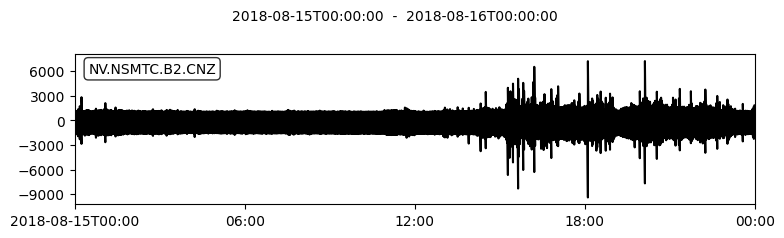

In [10]:
_plot = st.plot() # check waveform

## PSD estimate
use PPSD function from obsPy

In [11]:
# psd estimate
min_db = -200 # min. db 
max_db = -50 # max db
ddb = 1 # 1 db increment

In [12]:
tr = st[0] # first segment only. if data have gaps, only first segment is stored
ppsd = PPSD(stats=tr.stats, metadata=inv, db_bins=(min_db, max_db, ddb), ppsd_length=ppsd_length)

In [13]:
# computing PSD
ppsd.add(tr)

True

## PSD plot

In [14]:
period_low = 1/250 # 250 Hz
period_max = 1000 # 1000 sec 

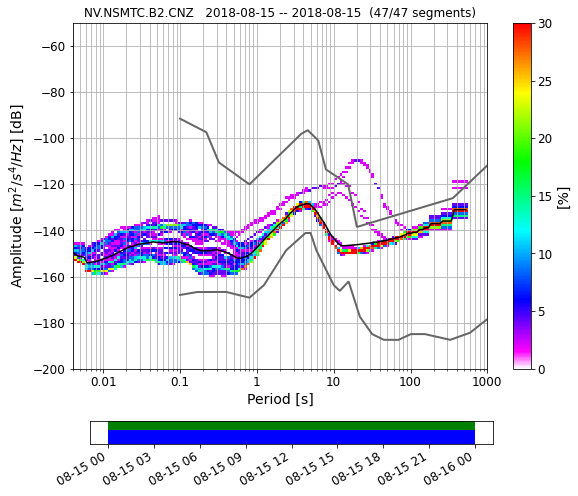

In [15]:
# probability density function of PSD plot
ppsd.plot(cmap=pqlx, period_lim=(period_low, period_max), show_mean = True, )

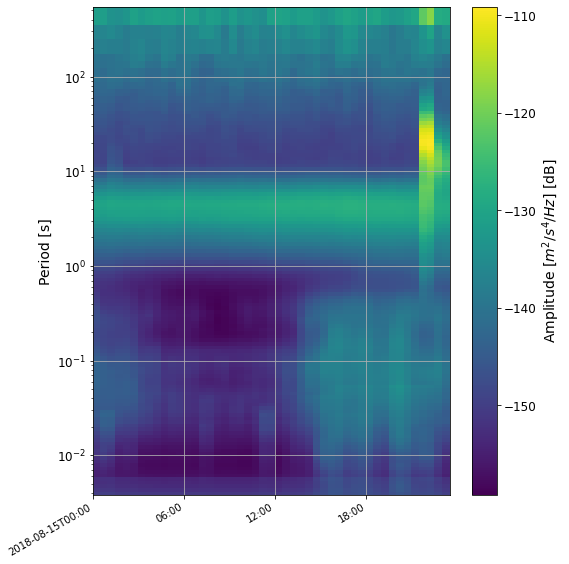

In [16]:
# spectrogram
ppsd.plot_spectrogram()